# How are in-demand skills trending for Data Analysts

## Methodology

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
#Import important libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ast
from datasets import load_dataset

In [2]:
#loading in the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
#Cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
#I only want to see Canadian jobs, so I'll filter for them
df_DA_CA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

In [5]:
#First we remove NA values
df_DA_CA = df_DA_CA.dropna(subset=['job_skills'])

#This line to see what we are working with
df_DA_CA['job_skills'].head()



1494                  [excel, tableau]
4971    [assembly, sas, sas, r, excel]
5032      [excel, outlook, powerpoint]
8327           [sql, bigquery, looker]
9335                      [excel, sap]
Name: job_skills, dtype: object

In [6]:
df_DA_CA_explode = df_DA_CA.explode('job_skills')

df_DA_CA_explode.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1494,Data Analyst,Data Analyst,Canada,via LinkedIn,Contractor,False,Canada,2023-01-26 13:19:41,True,False,Canada,None,NaN,NaN,BCforward,excel,"{'analyst_tools': ['excel', 'tableau']}"
1494,Data Analyst,Data Analyst,Canada,via LinkedIn,Contractor,False,Canada,2023-01-26 13:19:41,True,False,Canada,None,NaN,NaN,BCforward,tableau,"{'analyst_tools': ['excel', 'tableau']}"
4971,Data Analyst,Data Analyst,Canada,via BeBee Canada,Full-time,False,Canada,2023-06-15 13:28:27,False,False,Canada,None,NaN,NaN,The University of British Columbia,assembly,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
4971,Data Analyst,Data Analyst,Canada,via BeBee Canada,Full-time,False,Canada,2023-06-15 13:28:27,False,False,Canada,None,NaN,NaN,The University of British Columbia,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
4971,Data Analyst,Data Analyst,Canada,via BeBee Canada,Full-time,False,Canada,2023-06-15 13:28:27,False,False,Canada,None,NaN,NaN,The University of British Columbia,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [7]:
#To get the numeric value for the month of the job postings
df_DA_CA_explode['job_posted_month_no'] = df_DA_CA_explode['job_posted_date'].dt.month

df_DA_CA_pivot = df_DA_CA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc='size', fill_value=0)

df_DA_CA_pivot.loc['Total'] = df_DA_CA_pivot.sum()

df_DA_CA_pivot[df_DA_CA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_CA_pivot = df_DA_CA_pivot.drop('Total')

df_DA_CA_pivot

job_skills,airflow,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,bigquery,...,tidyverse,typescript,unify,unix,vba,visio,visual basic,windows,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,4,2,0,2,...,0,0,0,0,3,3,1,0,10,3
2,0,0,0,0,1,0,3,8,0,2,...,0,1,0,0,0,3,0,0,5,0
3,0,0,0,0,0,0,2,3,0,0,...,0,0,0,0,1,0,0,0,2,2
4,0,0,0,0,0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,6,1,1,...,0,0,2,1,0,2,0,0,1,0
6,0,1,0,1,0,0,1,1,0,0,...,0,0,0,0,4,4,0,0,6,0
7,2,0,1,0,1,0,0,5,0,1,...,1,0,1,0,4,0,0,0,1,0
8,0,1,0,0,0,0,4,4,0,5,...,0,0,2,0,1,2,0,0,3,0
9,2,1,0,0,0,1,4,7,0,2,...,0,0,0,1,1,3,0,1,3,0


In [8]:
DA_Totals = df_DA_CA_explode.groupby('job_posted_month_no').size()

In [9]:
df_DA_CA_percent = df_DA_CA_pivot.div(DA_Totals/100, axis=0)

df_DA_CA_percent

job_skills,airflow,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,bigquery,...,tidyverse,typescript,unify,unix,vba,visio,visual basic,windows,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.373134,0.000000,0.000000,0.000000,0.000000,1.492537,0.746269,0.000000,0.746269,...,0.000000,0.000000,0.000000,0.000000,1.119403,1.119403,0.373134,0.000000,3.731343,1.119403
2,0.000000,0.000000,0.000000,0.000000,0.680272,0.000000,2.040816,5.442177,0.000000,1.360544,...,0.000000,0.680272,0.000000,0.000000,0.000000,2.040816,0.000000,0.000000,3.401361,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.960784,2.941176,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.980392,0.000000,0.000000,0.000000,1.960784,1.960784
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.076923,3.076923,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.645161,0.000000,0.000000,0.645161,3.870968,0.645161,0.645161,...,0.000000,0.000000,1.290323,0.645161,0.000000,1.290323,0.000000,0.000000,0.645161,0.000000
6,0.000000,0.591716,0.000000,0.591716,0.000000,0.000000,0.591716,0.591716,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.366864,2.366864,0.000000,0.000000,3.550296,0.000000
7,1.290323,0.000000,0.645161,0.000000,0.645161,0.000000,0.000000,3.225806,0.000000,0.645161,...,0.645161,0.000000,0.645161,0.000000,2.580645,0.000000,0.000000,0.000000,0.645161,0.000000
8,0.000000,0.645161,0.000000,0.000000,0.000000,0.000000,2.580645,2.580645,0.000000,3.225806,...,0.000000,0.000000,1.290323,0.000000,0.645161,1.290323,0.000000,0.000000,1.935484,0.000000
9,0.826446,0.413223,0.000000,0.000000,0.000000,0.413223,1.652893,2.892562,0.000000,0.826446,...,0.000000,0.000000,0.000000,0.413223,0.413223,1.239669,0.000000,0.413223,1.239669,0.000000


In [10]:
df_DA_CA_percent = df_DA_CA_percent.reset_index()
df_DA_CA_percent['job_posted_month'] = df_DA_CA_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))
df_DA_CA_percent = df_DA_CA_percent.set_index('job_posted_month')
df_DA_CA_percent = df_DA_CA_percent.drop('job_posted_month_no', axis=1)

df_DA_CA_percent


job_skills,airflow,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,bigquery,...,tidyverse,typescript,unify,unix,vba,visio,visual basic,windows,word,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,0.000000,0.373134,0.000000,0.000000,0.000000,0.000000,1.492537,0.746269,0.000000,0.746269,...,0.000000,0.000000,0.000000,0.000000,1.119403,1.119403,0.373134,0.000000,3.731343,1.119403
February,0.000000,0.000000,0.000000,0.000000,0.680272,0.000000,2.040816,5.442177,0.000000,1.360544,...,0.000000,0.680272,0.000000,0.000000,0.000000,2.040816,0.000000,0.000000,3.401361,0.000000
March,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.960784,2.941176,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.980392,0.000000,0.000000,0.000000,1.960784,1.960784
April,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.076923,3.076923,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,0.000000,0.000000,0.000000,0.645161,0.000000,0.000000,0.645161,3.870968,0.645161,0.645161,...,0.000000,0.000000,1.290323,0.645161,0.000000,1.290323,0.000000,0.000000,0.645161,0.000000
June,0.000000,0.591716,0.000000,0.591716,0.000000,0.000000,0.591716,0.591716,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.366864,2.366864,0.000000,0.000000,3.550296,0.000000
July,1.290323,0.000000,0.645161,0.000000,0.645161,0.000000,0.000000,3.225806,0.000000,0.645161,...,0.645161,0.000000,0.645161,0.000000,2.580645,0.000000,0.000000,0.000000,0.645161,0.000000
August,0.000000,0.645161,0.000000,0.000000,0.000000,0.000000,2.580645,2.580645,0.000000,3.225806,...,0.000000,0.000000,1.290323,0.000000,0.645161,1.290323,0.000000,0.000000,1.935484,0.000000
September,0.826446,0.413223,0.000000,0.000000,0.000000,0.413223,1.652893,2.892562,0.000000,0.826446,...,0.000000,0.000000,0.000000,0.413223,0.413223,1.239669,0.000000,0.413223,1.239669,0.000000


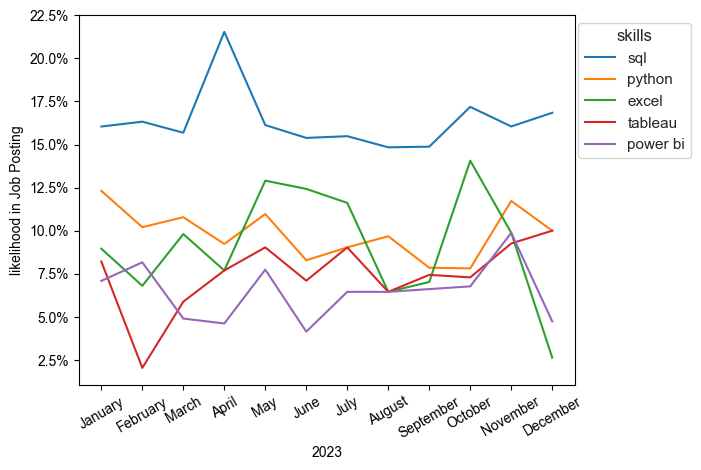

In [11]:
df_plot = df_DA_CA_percent[['sql','python','excel','tableau','power bi']]

sns.lineplot(data=df_plot, dashes =False, palette='tab10')
sns.set_theme(style='ticks')
plt.xticks(rotation=30)
plt.ylabel('likelihood in Job Posting')
plt.xlabel('2023')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right', title='skills')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

plt.show()